/home/public_1/yq/detectron2/detectron2/structures/keypoints.py:224: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_int = (pos - x_int) // w
/home/public_1/yq/detectron2/detectron2/structures/keypoints.py:224: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_int = (pos - x_int) // w


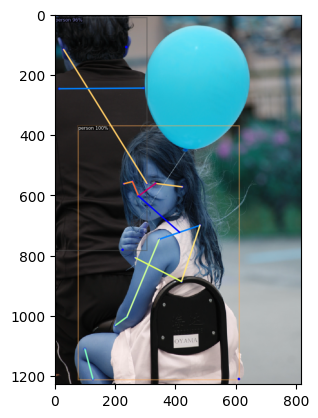

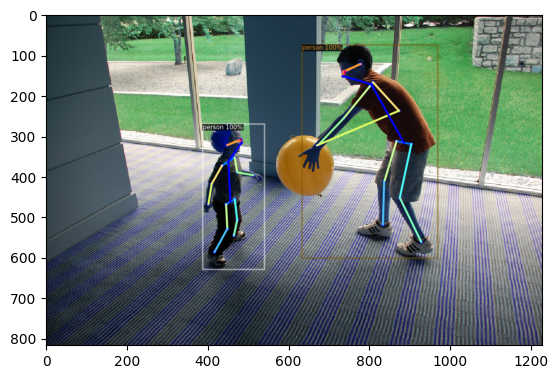

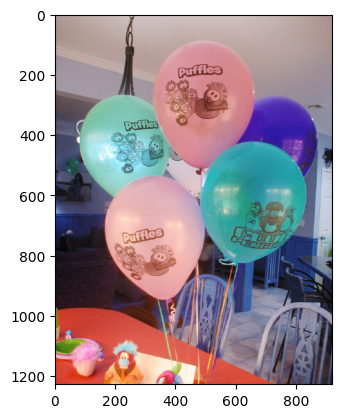

In [2]:
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt
import random
import cv2
import os

cfg = get_cfg()  # 获取新配置
cfg.merge_from_file(
    model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # 给模型设置阈值
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"
)

list = []
path="./balloon/val/"
for filename in os.listdir(path):
    if filename.endswith("jpg") or filename.endswith("png"):
        list.append(filename)
predictor = DefaultPredictor(cfg)
for i in random.sample(list, 3):
    im = cv2.imread(path + i)
    outputs = predictor(im)
    v = Visualizer(
        im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure()
    plt.imshow(out.get_image()[:, :, ::-1])
